# Hadckatton Santé

### Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# Import des fichiers d'étude
departements = pd.read_csv('liste_departements.csv')
densite_departement = pd.read_csv('densite_departement.csv')

In [3]:
densite_departement.head()

,Rang 2013,No INSEE,Département,1931,1999,2008,2010,2011,2012,2013,Superficie (km²),Densité (hab./km²)
0,1,59,Nord,2 029 736,2 555 020,2 564 959,2 576 770,2 579 208,2 587 128,2 595 536,5 743,452
1,2,75,Paris,2 891 020,2 125 246,2 211 297,2 243 833,2 249 975,2 240 621,2 229 621,105,21 154
2,3,13,Bouches-du-Rhône,1 101 672,1 835 719,1 966 005,1 972 018,1 975 896,1 984 784,1 993 177,5 087,392
3,NC,69,Circonscription départementale du Rhône,1 089 764,1 578 869,1 690 498,1 725 177,1 744 236,1 762 866,1 779 845,3 249,548
4,4,92,Hauts-de-Seine,949 231,1 428 881,1 549 619,1 572 490,1 581 628,1 586 434,1 591 403,176,9 062


In [4]:
# Importer les données de honoraires de medecins par spécialité & territoire

honoraire_medecin_specialite = pd.read_excel(
    'Honoraires_des_professionnels_de_sante__APE_par_departement_en_2014.xls',sheetname='Spécialistes',na_values='nc')
honoraire_medecin_specialite.rename(columns={'Spécialistes':'TYPE_MEDECIN'}, inplace=True)

honoraire_medecin_generalistes = pd.read_excel(
    'Honoraires_des_professionnels_de_sante__APE_par_departement_en_2014.xls',sheetname='Généralistes et MEP',na_values='nc')
honoraire_medecin_generalistes.rename(columns={'Généralistes et compétences MEP':'TYPE_MEDECIN'}, inplace=True)

honoraire_medecin_dentistes = pd.read_excel(
    'Honoraires_des_professionnels_de_sante__APE_par_departement_en_2014.xls',sheetname='Dentistes et ODF',na_values='nc')
honoraire_medecin_dentistes.rename(columns={'Chirurgiens-dentistes et ODF':'TYPE_MEDECIN'}, inplace=True)

In [5]:
# Importer les données des densites de medecins par spécialité & territoire

densite_medecin_specialite = pd.read_excel(
    'Effectif_et_densite_par_departement_en_2014.xls',sheetname='Spécialistes').drop(['Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11'], axis=1)
densite_medecin_specialite.rename(columns={'Spécialistes':'TYPE_MEDECIN'}, inplace=True)

densite_medecin_generalistes = pd.read_excel(
    'Effectif_et_densite_par_departement_en_2014.xls',sheetname='Généralistes et MEP')
densite_medecin_generalistes.rename(columns={'Généralistes et compétences MEP':'TYPE_MEDECIN'}, inplace=True)

densite_medecin_dentistes = pd.read_excel(
    'Effectif_et_densite_par_departement_en_2014.xls',sheetname='Dentistes et ODF')
densite_medecin_dentistes.rename(columns={'Chirurgiens-dentistes et ODF':'TYPE_MEDECIN'}, inplace=True)

In [6]:
# Nettoyage de certaines lignes
densite_medecin_specialite = densite_medecin_specialite[densite_medecin_specialite \
                    .TYPE_MEDECIN.str.contains("TOTAL") == False]
densite_medecin_specialite = densite_medecin_specialite[densite_medecin_specialite \
                    .DEPARTEMENT.str.contains("TOTAL") == False]

densite_medecin_generalistes = densite_medecin_generalistes[densite_medecin_generalistes \
                    .TYPE_MEDECIN.str.contains("TOTAL") == False]
densite_medecin_generalistes = densite_medecin_generalistes[densite_medecin_generalistes \
                    .DEPARTEMENT.str.contains("TOTAL") == False]

In [7]:
#******************************************************************************************#
honoraire_medecin_dentistes.dropna()
honoraire_medecin_dentistes = honoraire_medecin_dentistes.drop(['NOMBRE D\'APE',
        'HONORAIRES SANS DEPASSEMENT /APE (Euros)', 'DEPASSEMENTS /APE (Euros)',
        'FRAIS DE DEPLACEMENTS /APE (Euros)', 'HONORAIRES /APE (Euros)'], axis=1)

honoraire_medecin_generalistes.dropna()
honoraire_medecin_generalistes = honoraire_medecin_generalistes.drop(['NOMBRE D\'APE',
        'HONORAIRES SANS DEPASSEMENT /APE (Euros)', 'DEPASSEMENTS /APE (Euros)',
        'FRAIS DE DEPLACEMENTS /APE (Euros)', 'HONORAIRES /APE (Euros)'], axis=1)

honoraire_medecin_specialite.dropna()
honoraire_medecin_specialite = honoraire_medecin_specialite.drop(['NOMBRE D\'APE',
        'HONORAIRES SANS DEPASSEMENT /APE (Euros)', 'DEPASSEMENTS /APE (Euros)',
        'FRAIS DE DEPLACEMENTS /APE (Euros)', 'HONORAIRES /APE (Euros)'], axis=1)

In [28]:
stats_specialiste = pd.merge(left=honoraire_medecin_specialite, right=densite_medecin_specialite, how='right', on=['TYPE_MEDECIN' , 'DEPARTEMENT']).fillna(0)
stats_generaliste = pd.merge(left=honoraire_medecin_generalistes, right=densite_medecin_generalistes, how='right', on=['TYPE_MEDECIN' , 'DEPARTEMENT']).fillna(0)
stats_dentiste = pd.merge(left=honoraire_medecin_dentistes, right=densite_medecin_dentistes, how='right', on=['TYPE_MEDECIN' , 'DEPARTEMENT']).fillna(0)

In [31]:
stats_specialiste

,TYPE_MEDECIN,DEPARTEMENT,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENTS (Euros),TOTAL DES HONORAIRES (Euros),EFFECTIF,POPULATION FRANCAISE,DENSITE /100 000 hab.
0,02- Anesthésie-réanimation chirurgicale,01- Ain,0.0,0.0,0.0,0.0,15,627405.0,2.390800
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,0.0,0.0,0.0,0.0,22,540409.0,4.070991
2,02- Anesthésie-réanimation chirurgicale,03- Allier,4233333.0,451982.0,0.0,4685315.0,18,342593.0,5.254048
3,02- Anesthésie-réanimation chirurgicale,04- Alpes-Hte-Provence,0.0,0.0,0.0,0.0,5,162438.0,3.078097
4,02- Anesthésie-réanimation chirurgicale,05- Hautes-Alpes,0.0,0.0,0.0,0.0,7,141911.0,4.932669
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,18342734.0,8282632.0,4.0,26625370.0,103,1083268.0,9.508266
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,4885359.0,605218.0,0.0,5490577.0,23,321252.0,7.159489
7,02- Anesthésie-réanimation chirurgicale,08- Ardennes,0.0,0.0,0.0,0.0,6,281987.0,2.127758
8,02- Anesthésie-réanimation chirurgicale,09- Ariège,0.0,0.0,0.0,0.0,0,152944.0,0.000000
9,02- Anesthésie-réanimation chirurgicale,10- Aube,0.0,0.0,0.0,0.0,18,306490.0,5.872949


### Section des groupBy

In [29]:
# Que les generalistes    
densite_group_departement_generalistes = densite_medecin_generalistes \
        .groupby('TYPE_MEDECIN')
densite_generaliste = densite_group_departement_generalistes['DENSITE /100 000 hab.'] \
        .mean().sort_values(ascending = False)
    
effectif_generaliste = densite_group_departement_generalistes['EFFECTIF'] \
        .mean().sort_values(ascending = False)
    
stats_densite_generaliste = pd.concat([effectif_generaliste, densite_generaliste], axis=1)
    
# Que les specialistes
densite_group_departement_speciliste = densite_medecin_specialite \
        .groupby('TYPE_MEDECIN')
densite_specialiste = densite_group_departement_speciliste['DENSITE /100 000 hab.'] \
        .mean().sort_values(ascending = False)
    
effectif_specialiste = densite_group_departement_speciliste['EFFECTIF'] \
        .mean().sort_values(ascending = False)
    
stats_densite_specialiste = pd.concat([effectif_specialiste, densite_specialiste], axis=1)

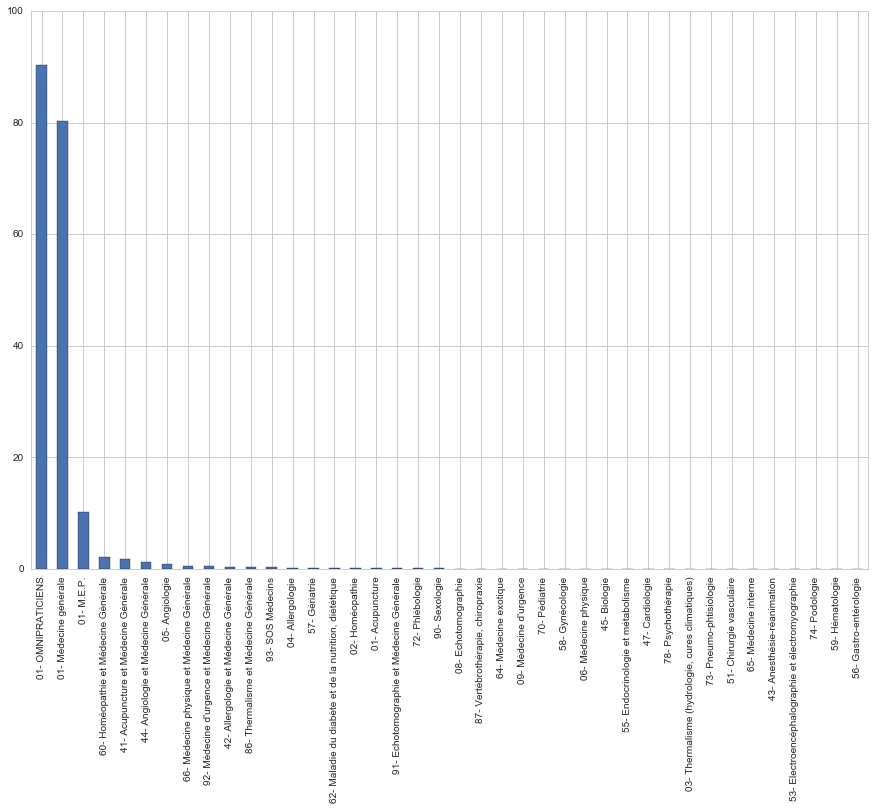

In [102]:
fig2 = plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
stats_densite_generaliste['DENSITE /100 000 hab.'].sort_values(ascending= False)[:40].plot(kind='bar')
plt.show()

### Group By sur la section generale

In [49]:
groupby_generalistes = stats_generaliste.groupby('TYPE_MEDECIN')
    
depassements_generaliste = groupby_generalistes['DEPASSEMENTS (Euros)'] \
        .mean().sort_values(ascending = False)
honoraires_generaliste = groupby_generalistes['HONORAIRES SANS DEPASSEMENT (Euros)'] \
        .sum().sort_values(ascending = False)
total_honoraires_generaliste = groupby_generalistes['TOTAL DES HONORAIRES (Euros)'] \
        .sum().sort_values(ascending = False)
densite_generaliste = groupby_generalistes['DENSITE /100 000 hab.'] \
        .mean().sort_values(ascending = False)
effectif_generaliste = groupby_generalistes['EFFECTIF'] \
        .mean().sort_values(ascending = False)
stats_densite_generaliste = pd.concat([depassements_generaliste,honoraires_generaliste,
                total_honoraires_generaliste,densite_generaliste,effectif_generaliste], axis=1)

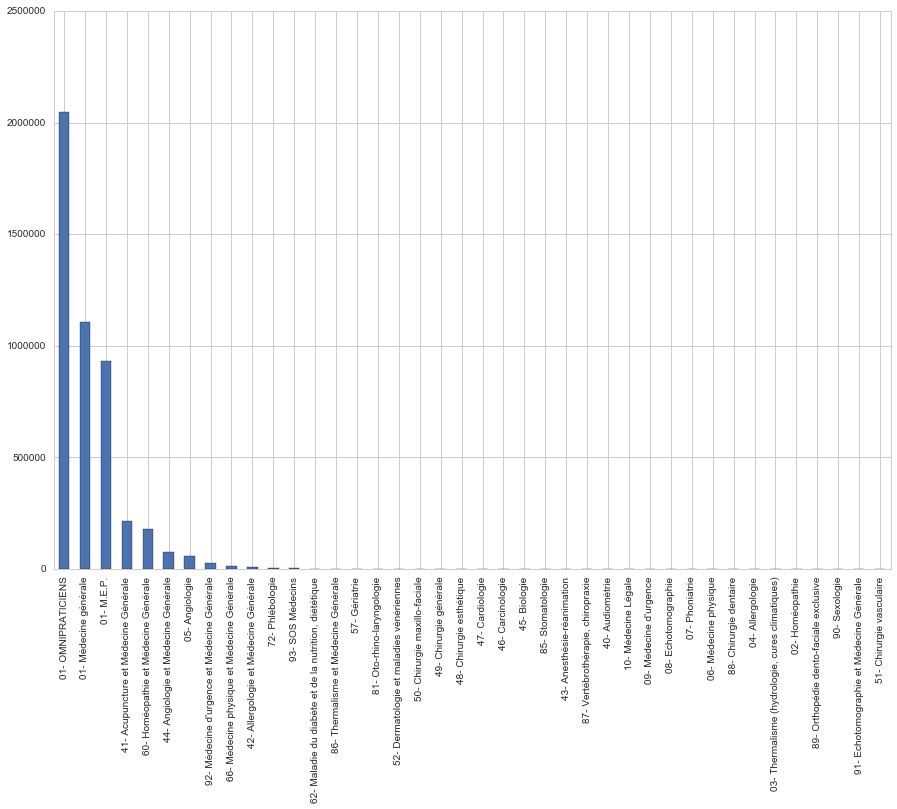

In [94]:
fig3 = plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
stats_densite_generaliste['DEPASSEMENTS (Euros)'].sort_values(ascending = False)[:40].plot(kind='bar')
plt.show()

In [56]:
groupby_specialistes = stats_specialiste.groupby('TYPE_MEDECIN')
    
depassements_specialistes = groupby_specialistes['DEPASSEMENTS (Euros)'] \
        .mean().sort_values(ascending = False)
honoraires_specialistes = groupby_specialistes['HONORAIRES SANS DEPASSEMENT (Euros)'] \
        .sum().sort_values(ascending = False)
total_honoraires_specialistes = groupby_specialistes['TOTAL DES HONORAIRES (Euros)'] \
        .sum().sort_values(ascending = False)
densite_specialistes = groupby_specialistes['DENSITE /100 000 hab.'] \
        .mean().sort_values(ascending = False)
effectif_specialistes = groupby_specialistes['EFFECTIF'] \
        .mean().sort_values(ascending = False)
stats_densite_specialistes = pd.concat([depassements_specialistes,honoraires_specialistes,
                total_honoraires_specialistes,densite_specialistes,effectif_specialistes], axis=1)

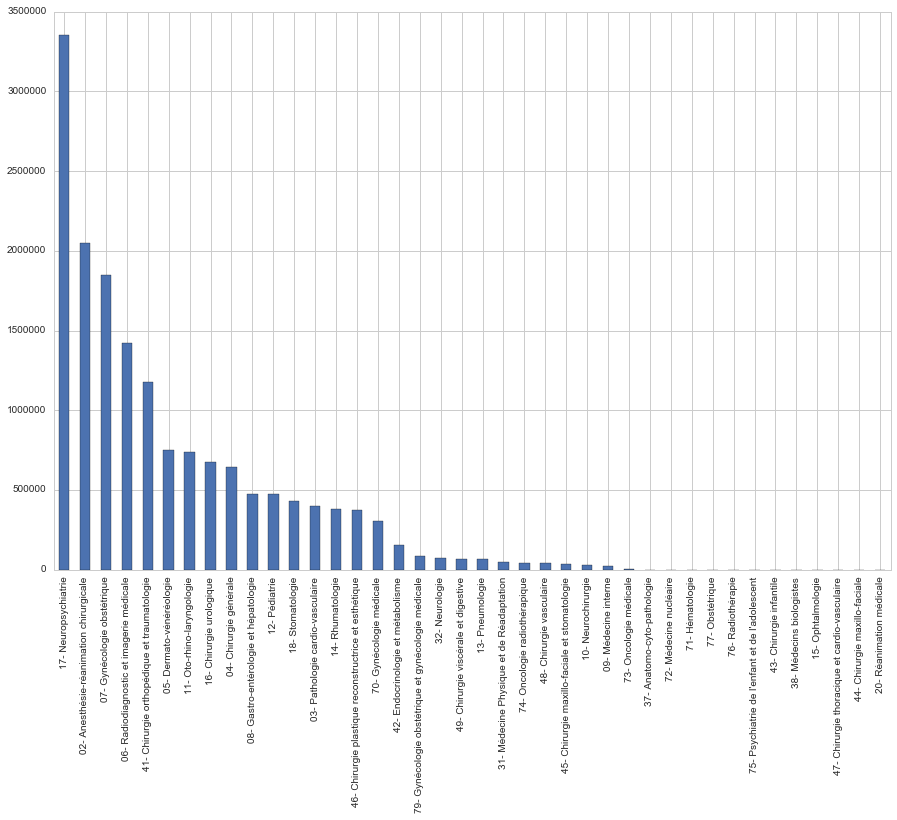

In [108]:
fig3 = plt.figure(figsize = (15,10))
sns.set(style = 'whitegrid')
stats_densite_specialistes['DEPASSEMENTS (Euros)'].sort_values(ascending = False)[:40].plot(kind='bar')
plt.show()

### Relation de correlation entre les departements et les depassements pour les specialistes

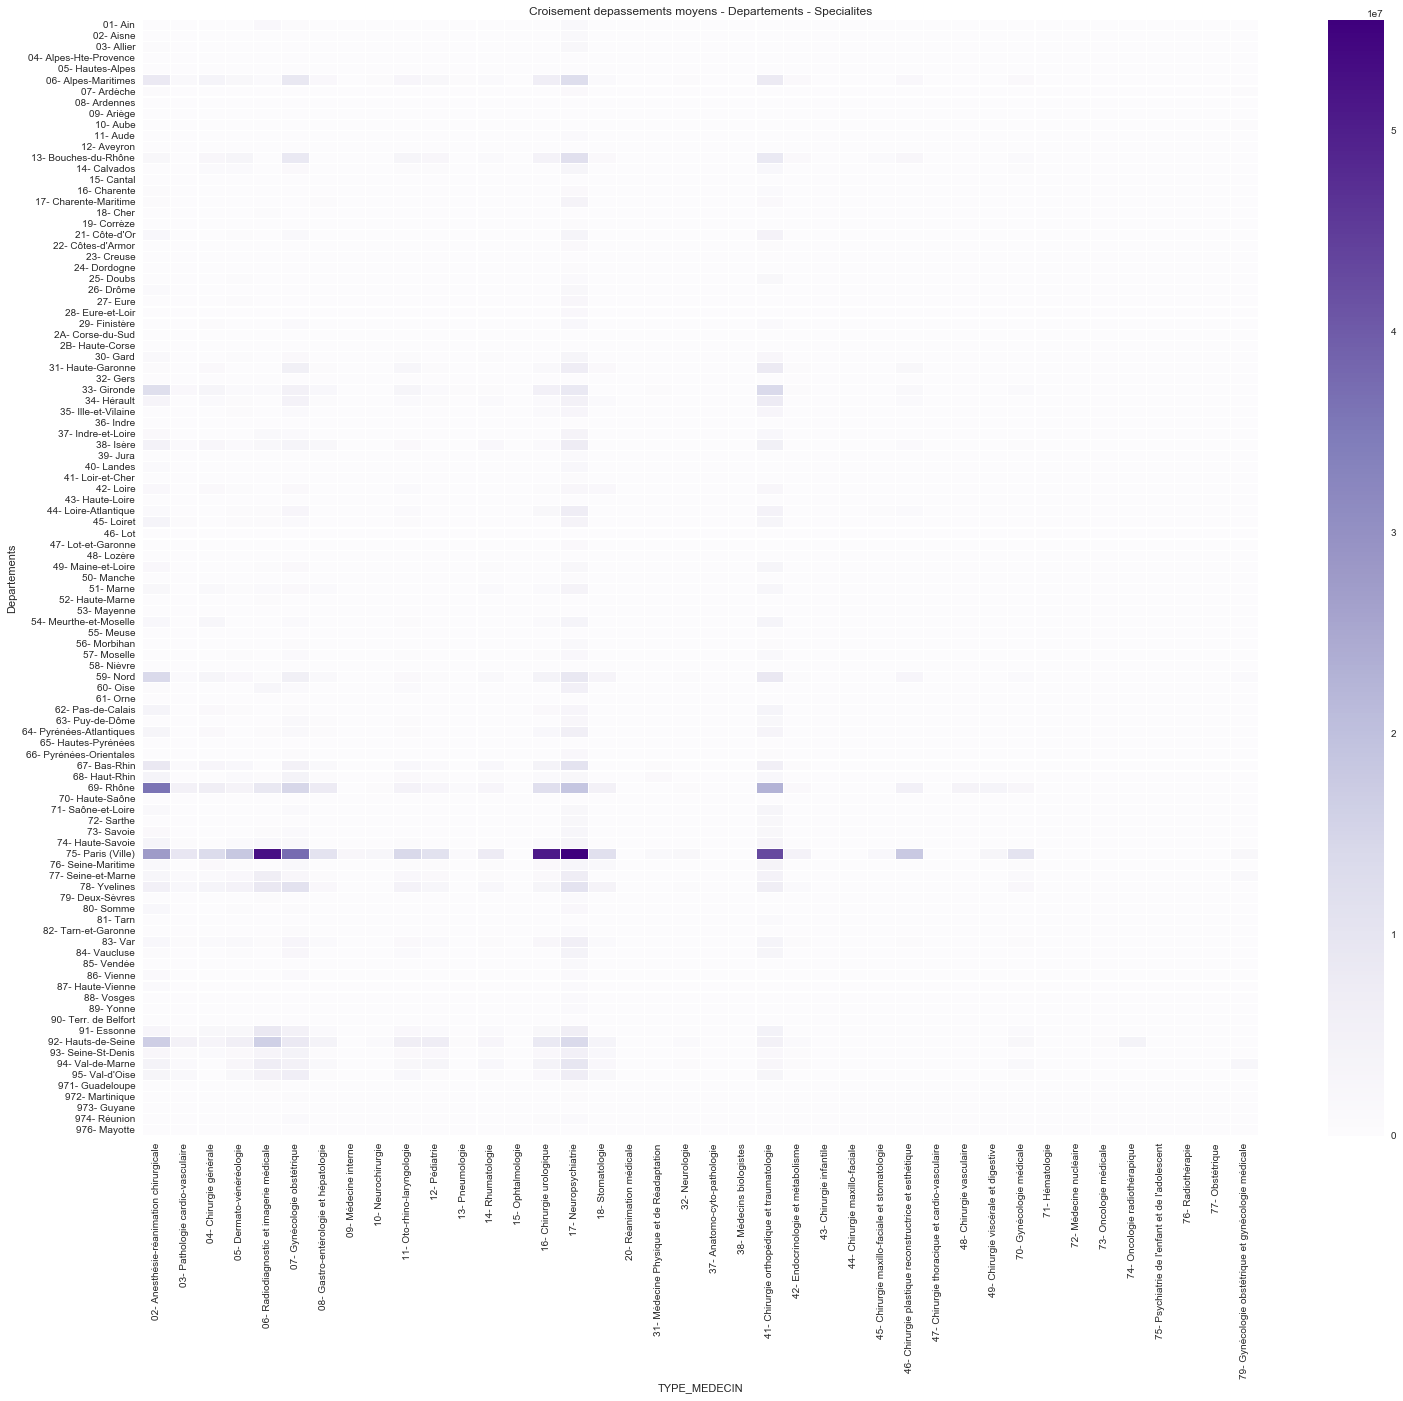

In [115]:
df = stats_specialiste
df_copy = df.groupby(df["TYPE_MEDECIN"])['DEPASSEMENTS (Euros)'].sum()
dir = df_copy.sort_values(ascending=False)[:40].index
piv = pd.pivot_table(data = df[df["TYPE_MEDECIN"].isin(dir)],
                                        index=["DEPARTEMENT"],
                                        columns=["TYPE_MEDECIN"],
                                        values=["DEPASSEMENTS (Euros)"],
                                        aggfunc= np.sum)
fig,ax = plt.subplots(figsize=(25,20))
sns.heatmap(piv['DEPASSEMENTS (Euros)'],vmin=0,annot=False,linewidth=.1,ax=ax, cmap = 'Purples')
plt.title('Croisement depassements moyens - Departements - Specialites')
plt.ylabel('Departements')

On remarque comme prévu que les depassements les plus notables sont dans la région de Paris pour des spécialitées pointues du type : Neuropsychiatre ou Radiognostique et imagerie médicale.

### Relation de correlation entre les departements et les depassements pour les generalistes

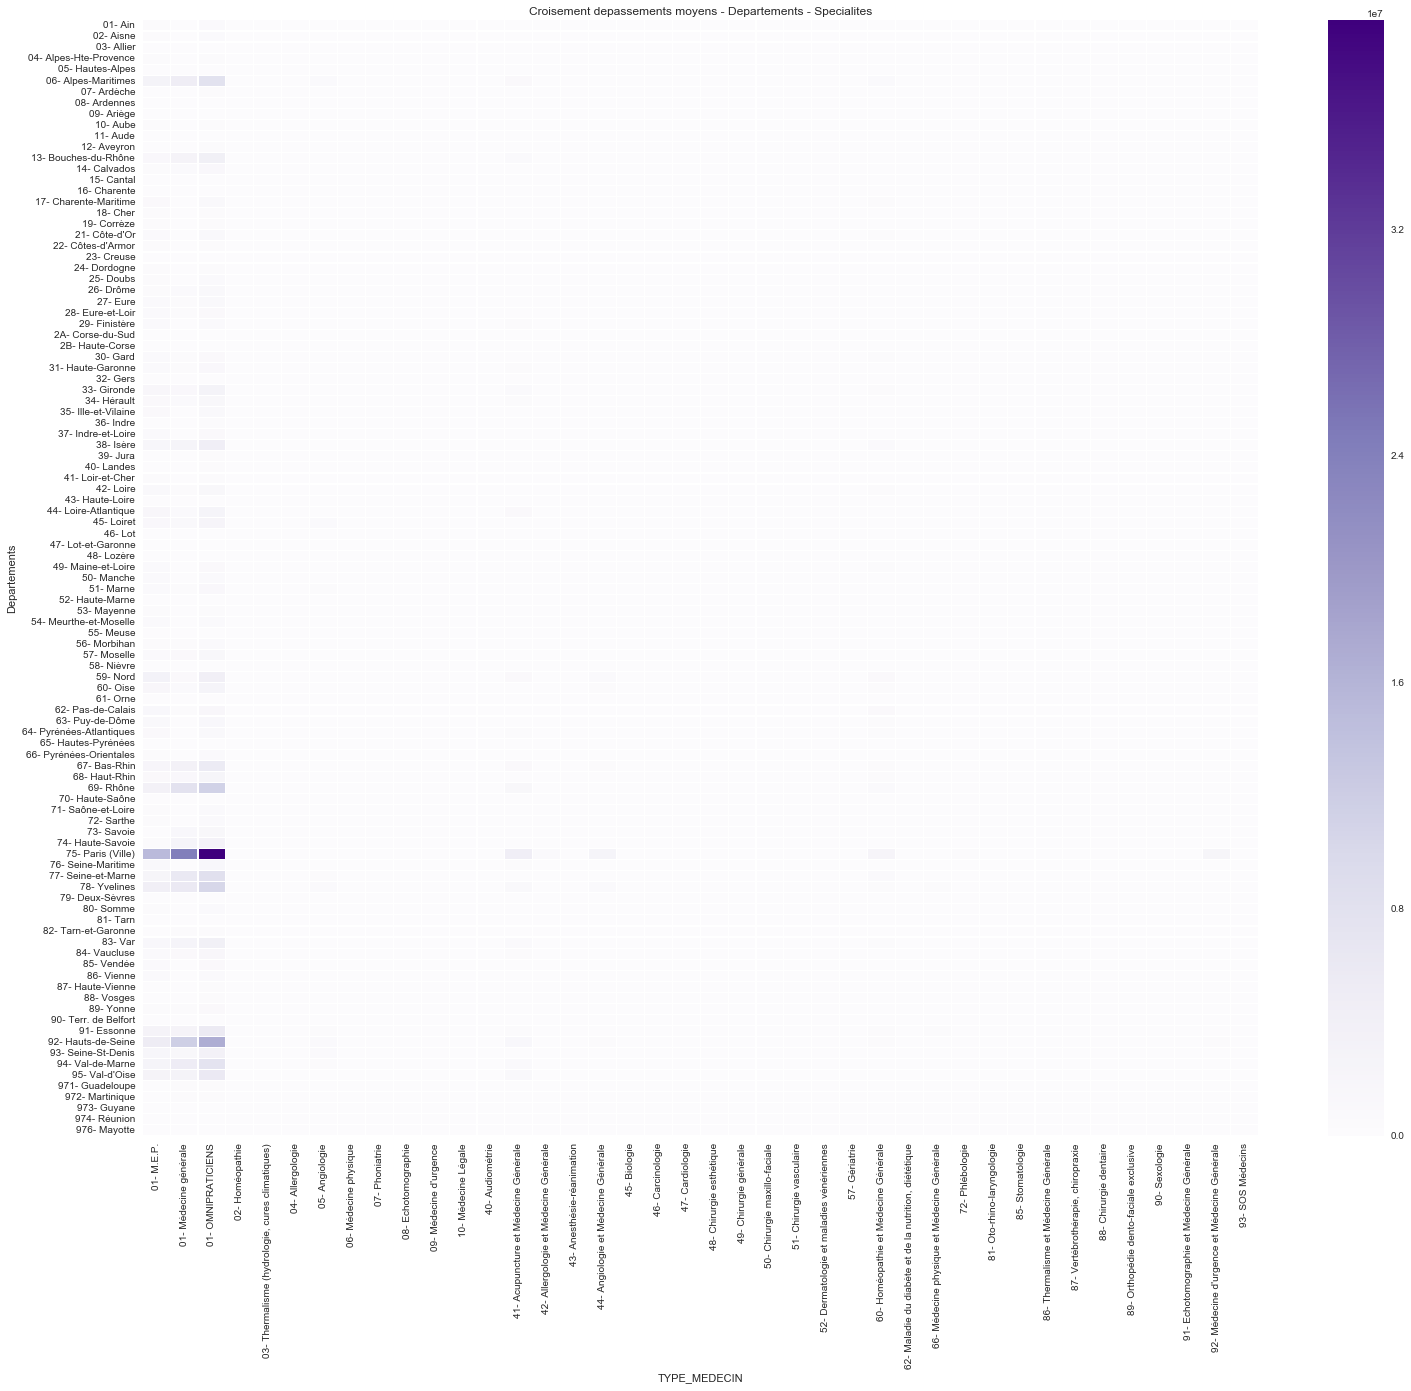

In [106]:
df = stats_generaliste
df_copy = df.groupby(df["TYPE_MEDECIN"])['DEPASSEMENTS (Euros)'].mean()
dir = df_copy.sort_values(ascending=False)[:40].index
piv = pd.pivot_table(data = df[df["TYPE_MEDECIN"].isin(dir)],
                                        index=["DEPARTEMENT"],
                                        columns=["TYPE_MEDECIN"],
                                        values=["DEPASSEMENTS (Euros)"],
                                        aggfunc= np.sum)
fig,ax = plt.subplots(figsize=(25,20))
sns.heatmap(piv['DEPASSEMENTS (Euros)'],vmin=0,annot=False,linewidth=.1,ax=ax, cmap = 'Purples')
plt.title('Croisement depassements moyens - Departements - Specialites')
plt.ylabel('Departements')

In [111]:
data_correlation = df[['DEPASSEMENTS (Euros)', 'DENSITE /100 000 hab.']]
corr_mat = data_correlation.corr()
print(corr_mat)

                       DEPASSEMENTS (Euros)  DENSITE /100 000 hab.
DEPASSEMENTS (Euros)               1.000000               0.245076
DENSITE /100 000 hab.              0.245076               1.000000
